**ПРАКТИЧЕСКАЯ РАБОТА 12. ЛОГИЧЕСКИЕ МЕТОДЫ КЛАССИФИКАЦИИ**

Коршиков Иван Сергеевич ПИН-б-о-22-1 09.03.03 Прикладная информатика

Цель: изучение принципов построения информационных систем с использованием логических методов классификации

Задачи:

освоение технологии внедрения алгоритмов на основе решающих списков в приложения
освоение технологии внедрения алгоритмов на основе решающих деревьев в приложения
изучение параметров логической классификации
освоение модификаций логических методов классификации

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
source_path = '/content/hayes-roth.data'
d = pd.read_table(source_path, delimiter=',', header=None, names=['name', 'hobby', 'age',
                                                                  'educational level', 'marital status', 'class'])

In [ ]:
d.info()
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   name               132 non-null    int64
 1   hobby              132 non-null    int64
 2   age                132 non-null    int64
 3   educational level  132 non-null    int64
 4   marital status     132 non-null    int64
 5   class              132 non-null    int64
dtypes: int64(6)
memory usage: 6.3 KB


,name,hobby,age,educational level,marital status,class
0,92,2,1,1,2,1
1,10,2,1,3,2,2
2,83,3,1,4,1,3
3,61,2,4,2,2,3
4,107,1,1,3,4,3


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
dX = d.iloc[:, 1:10]
dY = d['class']
print(dX.head())
print(dY.head())

   hobby  age  educational level  marital status  class
0      2    1                  1               2      1
1      2    1                  3               2      2
2      3    1                  4               1      3
3      2    4                  2               2      3
4      1    1                  3               4      3
0    1
1    2
2    3
3    3
4    3
Name: class, dtype: int64


In [ ]:
X_train, X_holdout, Y_train, Y_holdout = \
train_test_split(dX, dY, test_size=0.3, random_state=12)

tree = DecisionTreeClassifier(max_depth=5,
                              random_state=21,
                              max_features=2)
tree.fit(X_train, Y_train)

tree_pred = tree.predict(X_holdout)
accur = accuracy_score(Y_holdout, tree_pred)
print(accur)

0.825


In [ ]:
from sklearn.model_selection import cross_val_score

d_list = list(range(1,20))

cv_scores = []

for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d,
                                  random_state=21,
                                  max_features=2)
    scores = cross_val_score(tree, dX, dY, cv =10, scoring='accuracy')
    cv_scores.append(scores.mean())

Text(0, 0.5, 'MSE')

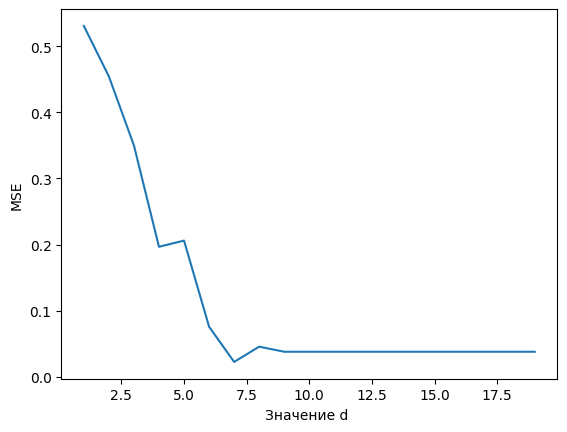

In [ ]:
MSE = [1-x for x in cv_scores]
plt.plot(d_list, MSE)
plt.xlabel("Значение d ")
plt.ylabel('MSE')

In [ ]:
d_min = min(MSE)
all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

print(all_d_min)

[7]


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

tree_params = {'max_depth': range(1,20), 'max_features': range(1,4)}
tree_grid = GridSearchCV(dtc, tree_params, cv = 10, verbose=True, n_jobs=-1)
tree_grid.fit(dX, dY)

print("\n")
print("Лучшее сочетание параметров: ", tree_grid.best_params_)
print("Лучшие баллы cross validation: ", tree_grid.best_score_)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 3, 'max_features': 3}
Лучшие баллы cross validation:  1.0


Получили наилучшие параметры для дерева: {'max_depth': 3, 'max_features': 3} И далее визуализируем полученное дерево

In [ ]:
dY.unique()

array([1, 2, 3])

In [ ]:
tree.export_graphviz(tree_grid.best_estimator_,
                     feature_names=dX.columns,
                     class_names=dY.unique().astype(str),
                     out_file='hayes-roth.dot',
                     filled=True, rounded=True)

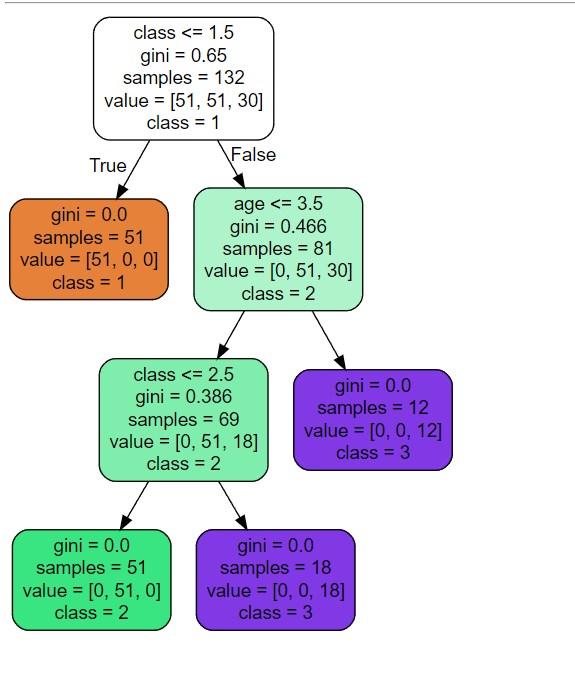

Максимальная глубина 3

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3,
                             random_state=21,
                              max_features=3)
dtc.fit(dX, dY)
res = dtc.predict([[5.1, 3.5, 1.4, 0.2, 30.]])
print(res)

[3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
d = pd.read_csv(source_path, delimiter=',', header=None, names=['name', 'hobby', 'age',
                                                                  'educational level', 'marital status', 'class'])
dX = d.iloc[:, :5]
dY = d['class']

In [ ]:
d.head


<bound method NDFrame.head of      name  hobby  age  educational level  marital status  class
0      92      2    1                  1               2      1
1      10      2    1                  3               2      2
2      83      3    1                  4               1      3
3      61      2    4                  2               2      3
4     107      1    1                  3               4      3
..    ...    ...  ...                ...             ...    ...
127    44      1    1                  4               3      3
128    40      2    1                  2               1      1
129    90      1    2                  1               2      2
130    21      1    2                  2               1      2
131     9      3    1                  1               2      1

[132 rows x 6 columns]>

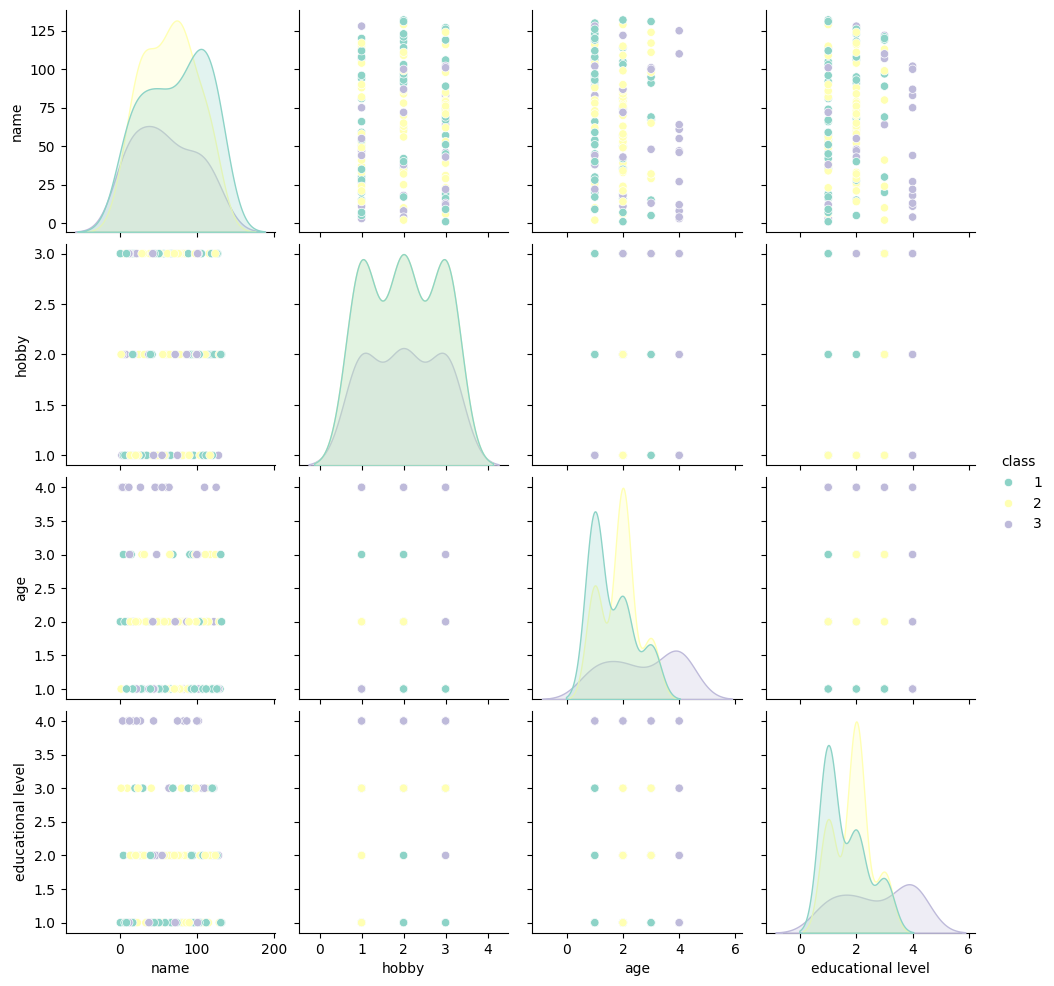

In [ ]:
sns.pairplot(d[['name', 'hobby',
                'age','educational level',
                'class']], hue = 'class', palette='Set3')

In [ ]:
dY.unique()

array([1, 2, 3])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X

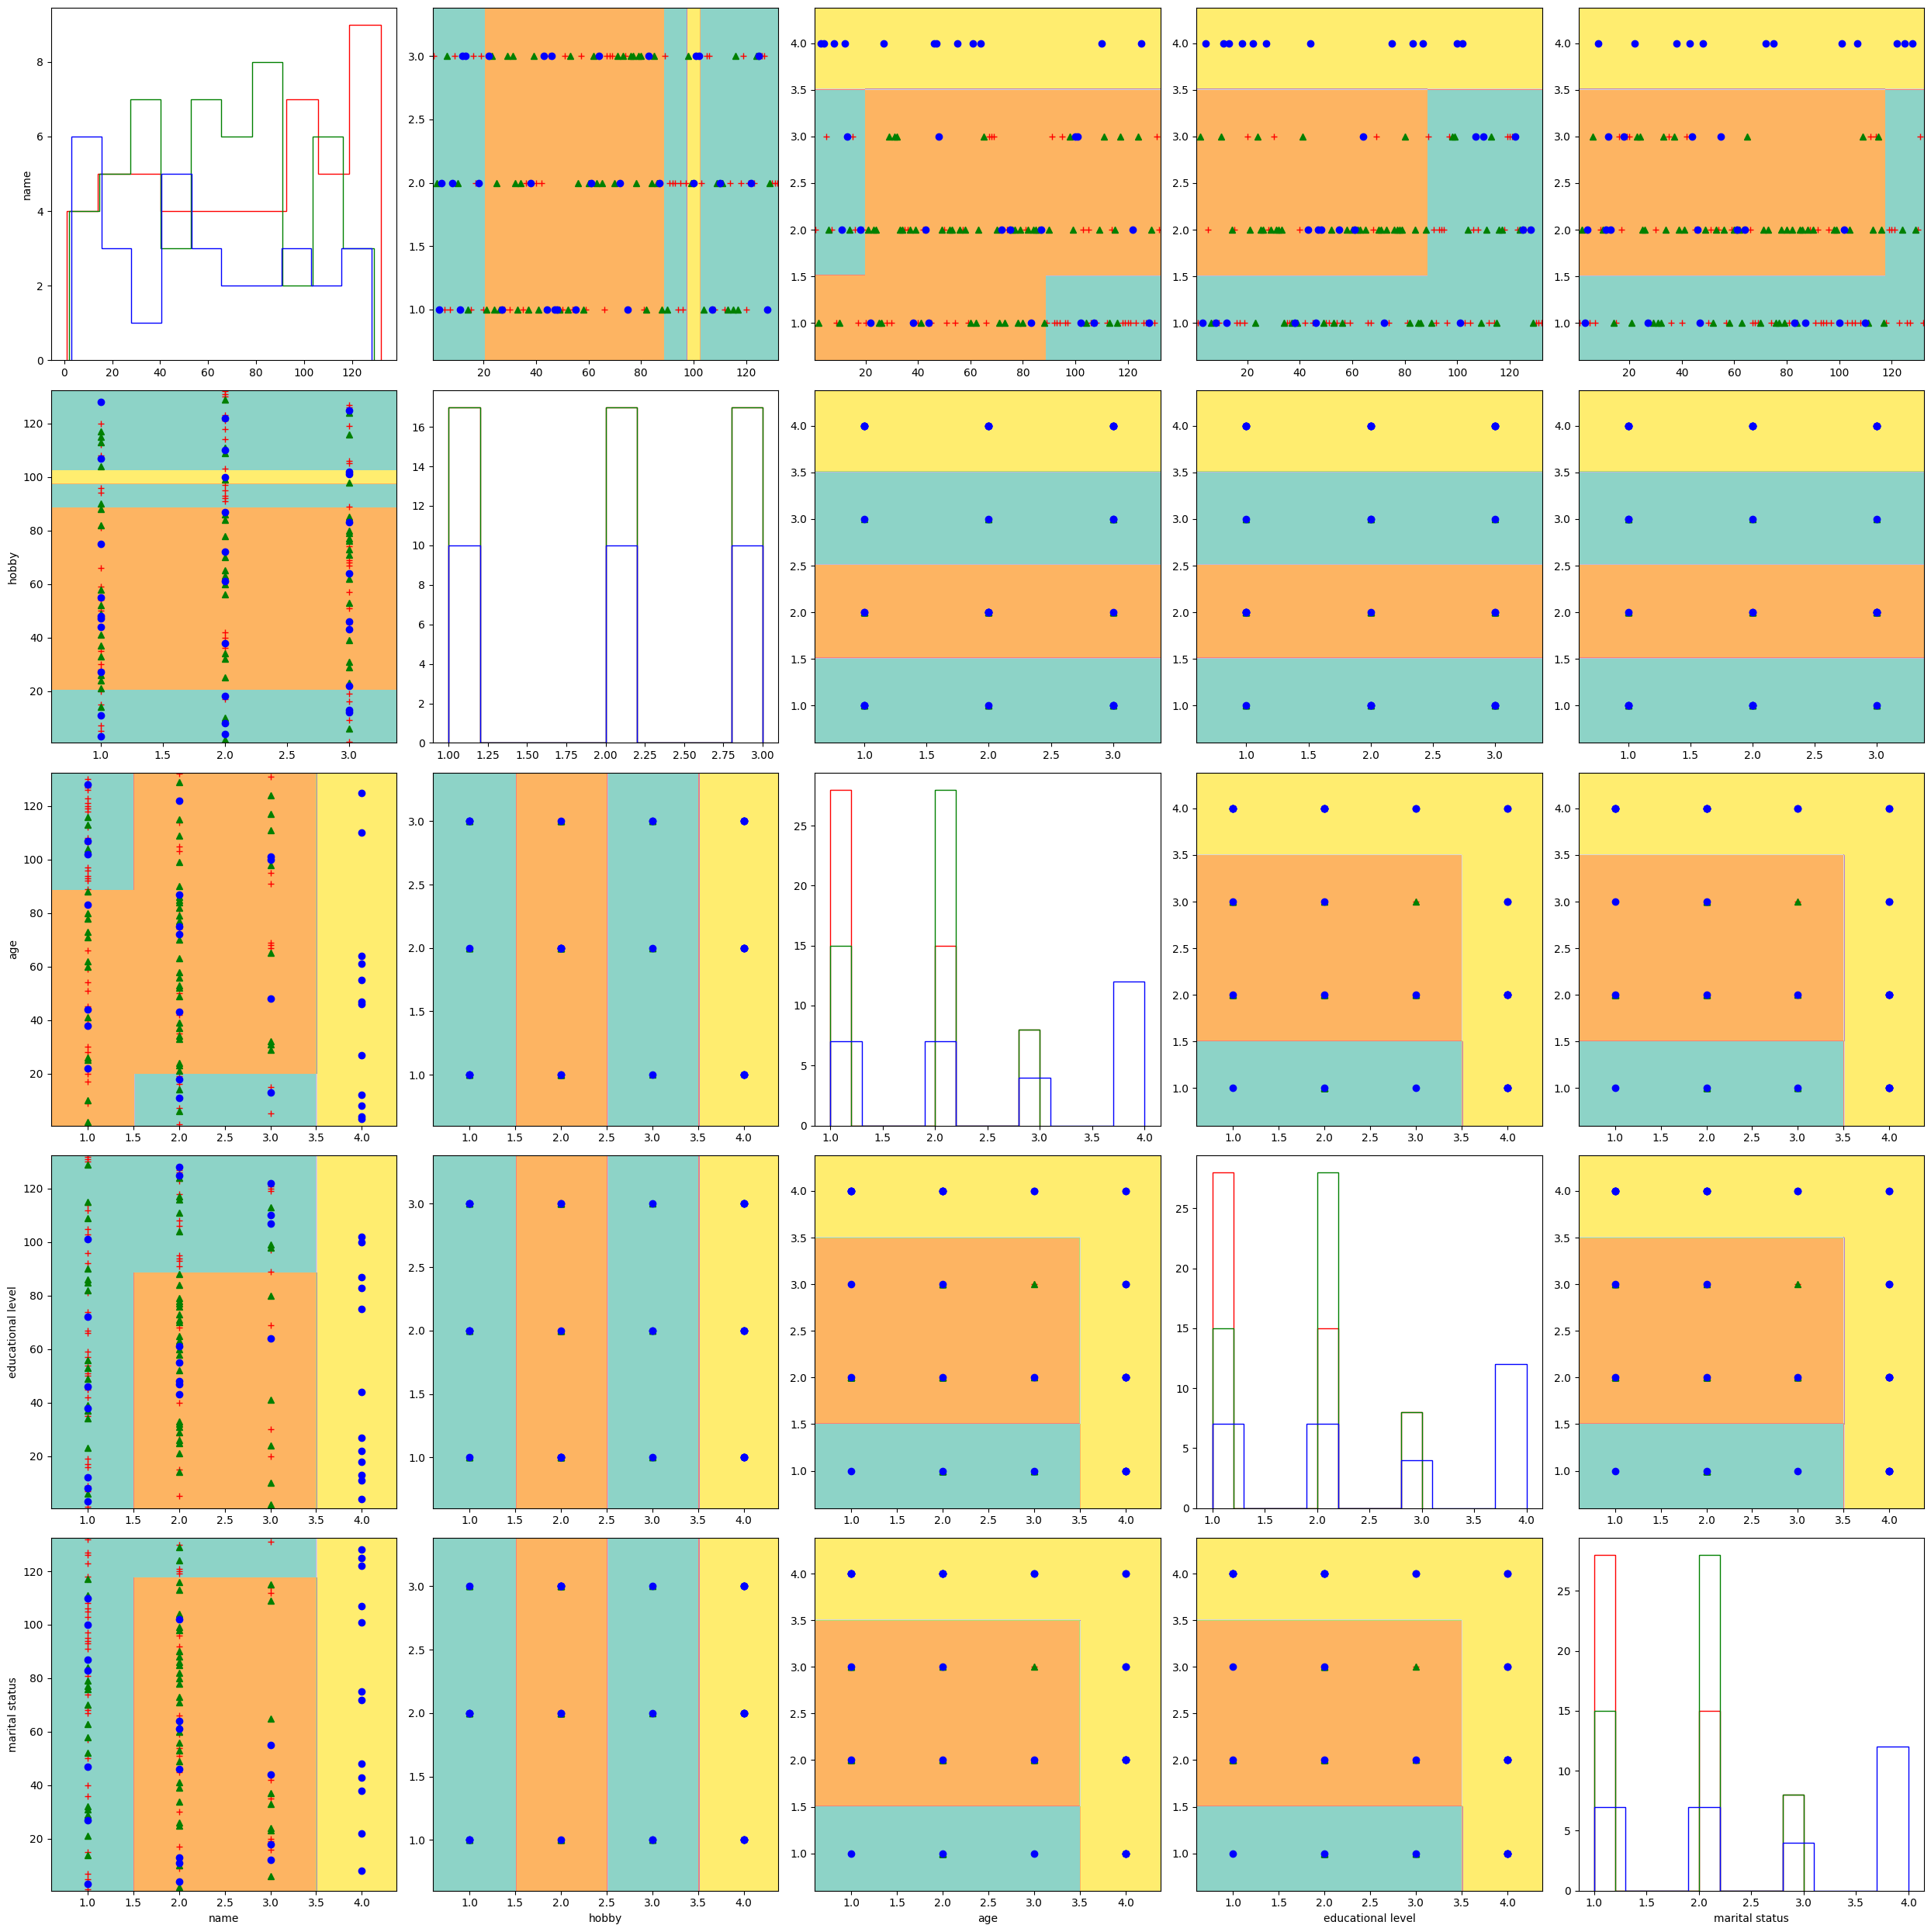

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

plot_markers = ['r+', 'g^', 'bo', 'ys']
answers = dY.unique()

#Corrected: Now 5x5 grid
f, places = plt.subplots(5, 5, figsize=(25, 25))

fmin = dX.min(axis=0).values - 0.4
fmax = dX.max(axis=0).values + 0.4
plot_step = 0.02

for i in range(5):
    for j in range(5):
        if i != j:
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                                 np.arange(fmin[j], fmax[j], plot_step))
            model = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=3)
            model.fit(dX.iloc[:, [i, j]], dY)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            answers_mapping = {answer: idx for idx, answer in enumerate(answers)}
            p = np.array([answers_mapping[answer] for answer in p])
            p = p.reshape(xx.shape)
            places[i, j].contourf(xx, yy, p, cmap='Set3')

        for id_answer in range(len(answers)):
            idx = np.where(dY == answers[id_answer])[0]
            if i == j:
                places[i, j].hist(dX.iloc[idx, i],
                                 color=plot_markers[id_answer][0],
                                 histtype='step')
            else:
                places[i, j].plot(dX.iloc[idx, i], dX.iloc[idx, j],
                                 plot_markers[id_answer],
                                 label=answers[id_answer], markersize=6)
        if j == 0:
            places[i, j].set_ylabel(dX.columns[i])
        if i == 4:  # Changed to 4 because it's now a 5x5 grid
            places[i, j].set_xlabel(dX.columns[j])

plt.tight_layout()
plt.show()

Получили множество графиков, на многих из которых отчетливо видны границы решающего дерева и соответствующие им точки разных классов. Но так как признаков в датасете достаточно много, для более отчетливой визуализаци лучше делать графики отдельно для нужных признаков

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X

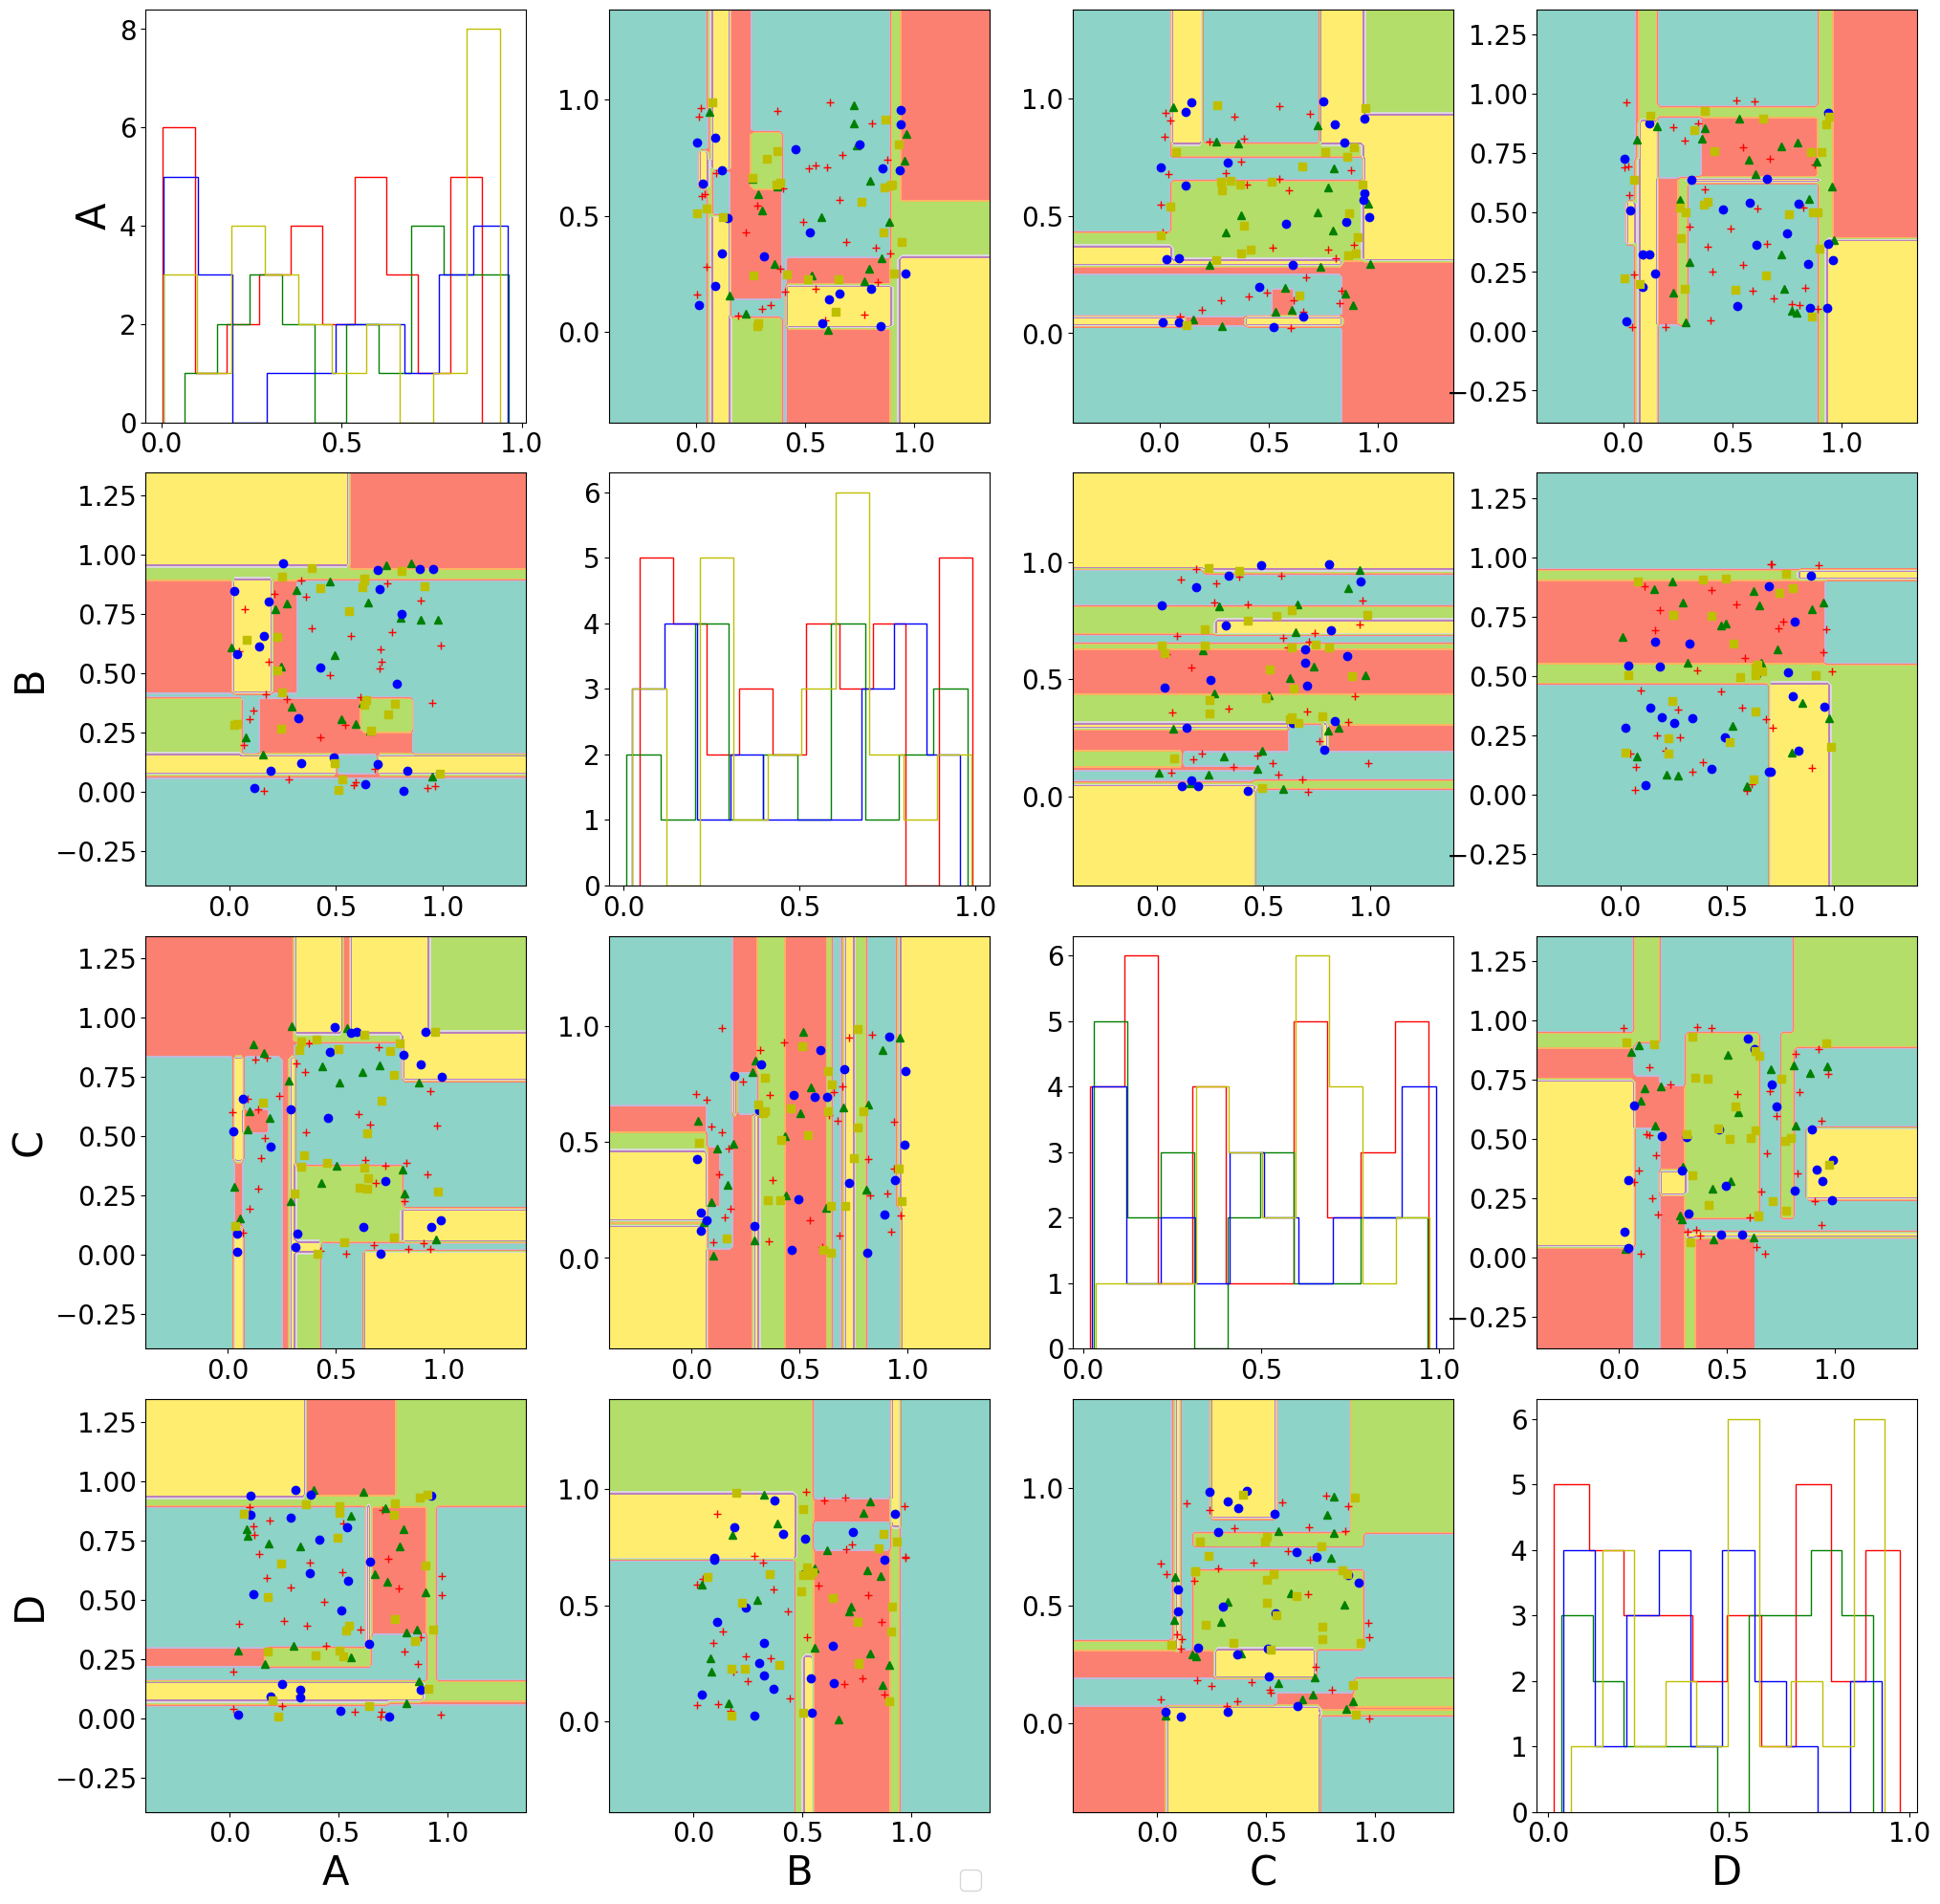

In [ ]:
np.random.seed(42)
dX = pd.DataFrame(np.random.rand(100, 4), columns=['A', 'B', 'C', 'D'])
dY = pd.Series(np.random.randint(0, 4, 100))

plot_markers = ['r+', 'g^', 'bo', 'ys']
answers = dY.unique()

num_features = dX.shape[1]
fig, axes = plt.subplots(num_features, num_features, figsize=(20, 20))

fmin = dX.min(axis=0).values - 0.4
fmax = dX.max(axis=0).values + 0.4
plot_step = 0.02

for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]  # Access the subplot axes directly
        if i != j:
            #Handle cases with low variance to avoid np.arange errors
            if fmax[i] - fmin[i] < plot_step or fmax[j] - fmin[j] < plot_step:
                continue #Skip if low variance
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                                 np.arange(fmin[j], fmax[j], plot_step))
            model = DecisionTreeClassifier(max_depth=6, random_state=21, max_features=2)
            model.fit(dX.iloc[:, [i, j]], dY)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = np.array([int(pred) for pred in p])
            p = p.reshape(xx.shape)
            im = ax.contourf(xx, yy, p, cmap='Set3')

        for id_answer in range(len(answers)):
            idx = np.where(dY == answers[id_answer])[0]
            if i == j:
                ax.hist(dX.iloc[idx, i], color=plot_markers[id_answer][0], histtype='step')
            else:
                ax.plot(dX.iloc[idx, i], dX.iloc[idx, j], plot_markers[id_answer], markersize=6)

        ax.tick_params(axis='both', labelsize=20)
        if j == 0:
            ax.set_ylabel(dX.columns[i], fontsize=30)
        if i == num_features - 1:
            ax.set_xlabel(dX.columns[j], fontsize=30)


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, answers, loc='lower center', ncol=len(answers), fontsize=20)
plt.tight_layout()
plt.show()

Как видно из графиков, по одной паре признаков почти нельзя установить класс объекта, все они имеют разную информативность